In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

import scienceplots
import time

plt.style.use(['science', 'notebook', 'grid'])

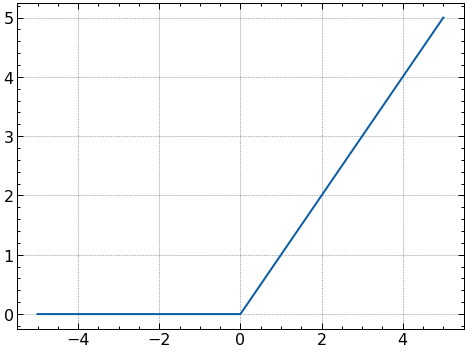

In [2]:
x=torch.linspace(-5,5,500)
R=nn.ReLU()
y=R(x)

plt.plot(x.numpy(),y.numpy())
plt.show()

In [3]:
class MyNeuralNet2(nn.Module):

    def __init__(self):
        # Note: super()
        super().__init__()
        self.Matrix1 = nn.Linear(2, 80)
        self.Matrix = nn.Linear(80, 80)
        self.Matrix2 = nn.Linear(80, 1)
        self.R = nn.ReLU()

    def forward(self, x):
        # pseudo Sequential
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix(x))
        x = self.Matrix2(x)
        return x.squeeze()

In [4]:
def train_model(x,y,f,n_epochs=50):
    # 'method' object is not iterable
    opt=SGD(f.parameters(),lr=0.001)
    L=nn.MSELoss()
    
    losses=[]
    for _ in range(n_epochs):
        opt.zero_grad()
        loss_value=L(f(x),y)
        loss_value.backward()
        opt.step()
        # 非计算图的一部分，减小显存
        losses.append(loss_value.item())
    return f,losses

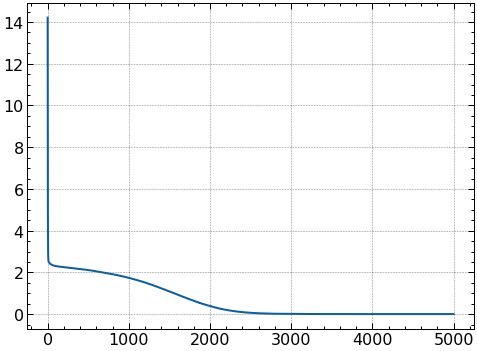

In [5]:
x=torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y=torch.tensor([1,5,2,5]).float()
f2=MyNeuralNet2()

f2,losses=train_model(x,y,f2,5000)
plt.plot(losses)

In [6]:
f2(x)

tensor([1.0000, 4.9992, 1.9999, 4.9996], grad_fn=<SqueezeBackward0>)

In [7]:
y

tensor([1., 5., 2., 5.])